---
**Experiment 2:**
---

---

**Demonstrate Perceptron's convergence on linearly separable data and explore hyperparameter effects.**

---

    Step 1: Data Preparation

        .	Load or generate a binary classification dataset.
        For example, use the first two features of the
        Iris dataset to classify Setosa vs. Versicolor.

        .	Split into training and testing sets

        .	Normalize features if needed (e.g., subtract mean
        and divide by standard deviation).

In [2]:
#importing modules
import numpy as np
import pandas as pd
np.random.seed(72)

In [3]:
#importing dataset
from sklearn.datasets import load_iris
# Load Iris data (binary: Setosa vs. others)
iris = load_iris()
X = iris.data[:100, :2]  # First two features, first 100 samples
y = iris.target[:100]
y[y == 0] = -1  # Setosa as 0, others as 1

In [4]:
#Split into training and testing sets

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=72)

In [5]:
xtrain.shape

(70, 2)

In [6]:
ytrain.shape

(70,)

In [7]:
xtest.shape

(30, 2)

In [8]:
ytest.shape

(30,)

In [9]:
#normalize features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

    Step 2: Implement the Perceptron Class
    
        Create a class with methods for prediction and training.

In [10]:
#Implement the Perceptron Class
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = np.sign(linear_output)
                #y_pred= 1 if y_pred >=0.5 else 0
                if y_pred != y[idx]:
                    self.weights += self.lr * y[idx] * x_i
                    self.bias += self.lr * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.sign(linear_output)


    Step 3: Training and Evaluation
        
        Instantiate and train the Perceptron.
        
        Predict on test data and compute accuracy.


In [11]:
#training the Perceptron.
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(xtrain, ytrain)


In [12]:
#Predicting on test data
predictions = perceptron.predict(xtest)
accuracy = np.mean(predictions == ytest)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


    Step 4: Visualization
        
        Plot the decision boundary and data points.


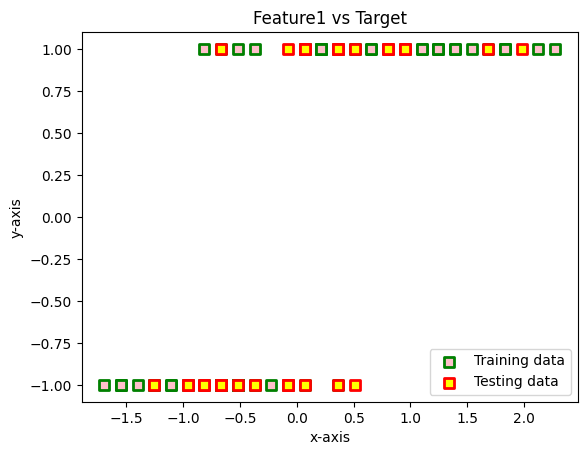

In [13]:
#plotting training vs testing dataset
import matplotlib.pyplot as plt
plt.scatter(xtrain[:,0],ytrain,c='pink',linewidth=2,marker='s',edgecolor='green',s=50,label="Training data")
plt.scatter(xtest[:,0],ytest,c='yellow',linewidth=2,marker='s',edgecolor='red',s=50,label="Testing data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Feature1 vs Target")
plt.legend()
plt.show()

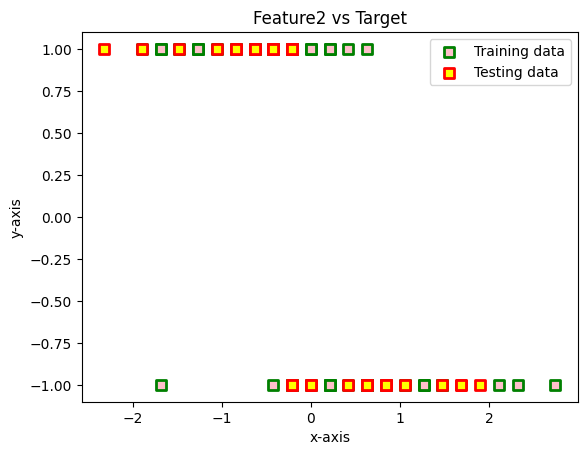

In [14]:
#plotting training vs testing dataset
import matplotlib.pyplot as plt
plt.scatter(xtrain[:,1],ytrain,c='pink',linewidth=2,marker='s',edgecolor='green',s=50,label="Training data")
plt.scatter(xtest[:,1],ytest,c='yellow',linewidth=2,marker='s',edgecolor='red',s=50,label="Testing data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Feature2 vs Target")
plt.legend()
plt.show()

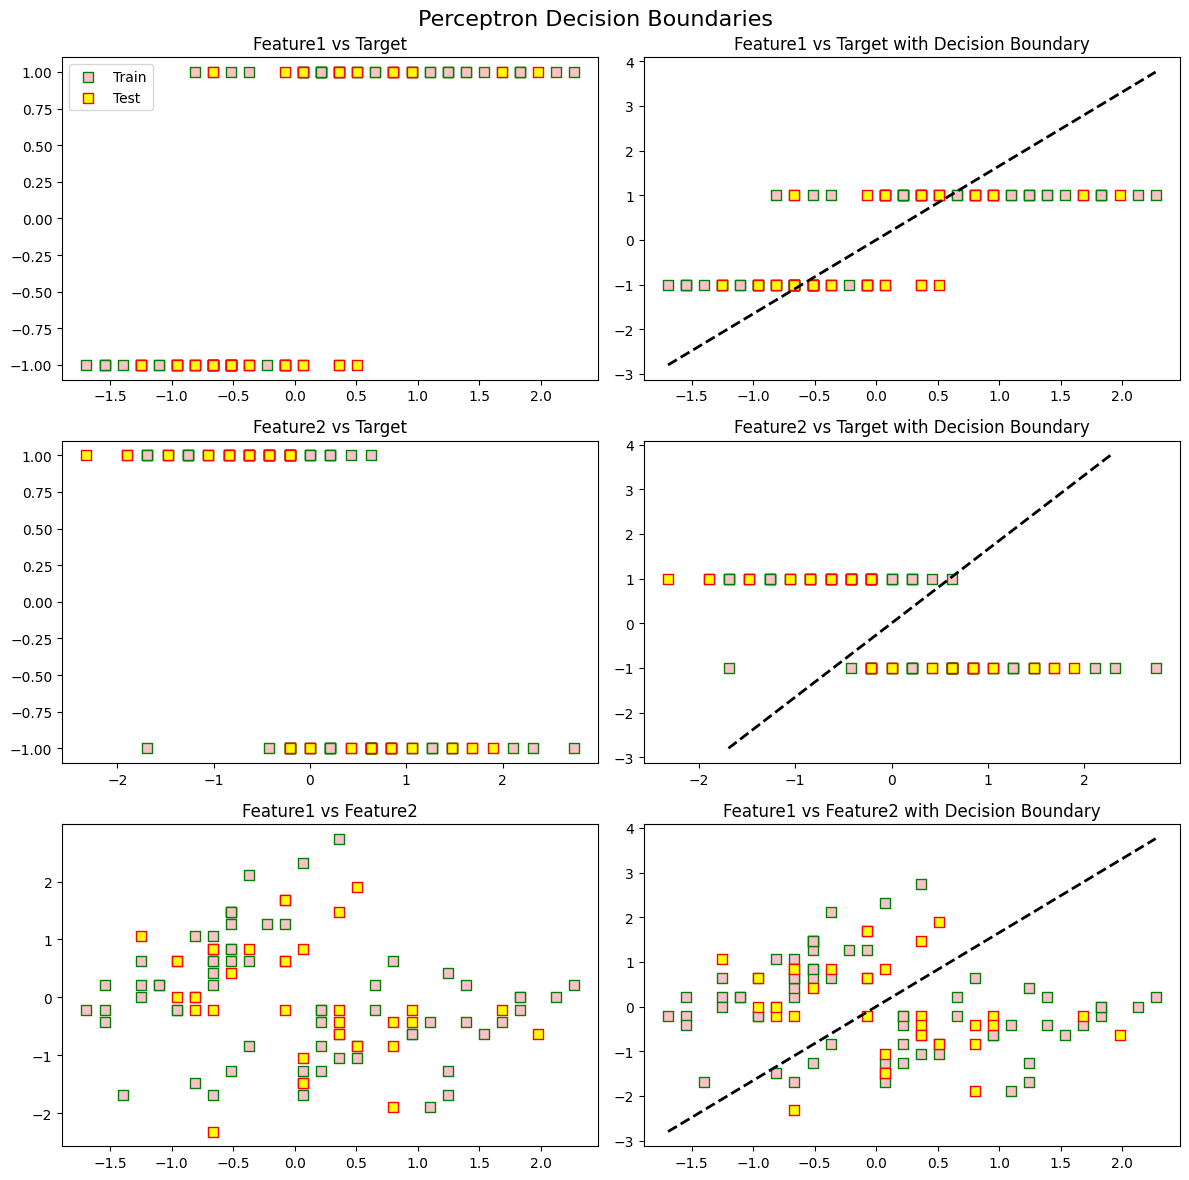

In [15]:
# Create 3x2 subplots with scatter plots and decision boundaries
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Perceptron Decision Boundaries', fontsize=16)

# Helper function for decision boundary line
def plot_db(ax, x_range, weights, bias):
    if weights[1] != 0:
        y_db = -(weights[0]*x_range + bias)/weights[1]
        ax.plot(x_range, y_db, 'k--', linewidth=2)

# Generate x_range for decision boundaries
x_range = np.linspace(min(xtrain[:,0].min(), xtest[:,0].min()),
                      max(xtrain[:,0].max(), xtest[:,0].max()), 100)

# Row 1: Feature 1 vs Target
axes[0,0].scatter(xtrain[:,0], ytrain, c='pink', edgecolor='green', s=50, marker='s', label='Train')
axes[0,0].scatter(xtest[:,0], ytest, c='yellow', edgecolor='red', s=50, marker='s', label='Test')
axes[0,0].set_title('Feature1 vs Target'); axes[0,0].legend()

axes[0,1].scatter(xtrain[:,0], ytrain, c='pink', edgecolor='green', s=50, marker='s')
axes[0,1].scatter(xtest[:,0], ytest, c='yellow', edgecolor='red', s=50, marker='s')
plot_db(axes[0,1], x_range, perceptron.weights, perceptron.bias)
axes[0,1].set_title('Feature1 vs Target with Decision Boundary')

# Row 2: Feature 2 vs Target
axes[1,0].scatter(xtrain[:,1], ytrain, c='pink', edgecolor='green', s=50, marker='s')
axes[1,0].scatter(xtest[:,1], ytest, c='yellow', edgecolor='red', s=50, marker='s')
axes[1,0].set_title('Feature2 vs Target')

axes[1,1].scatter(xtrain[:,1], ytrain, c='pink', edgecolor='green', s=50, marker='s')
axes[1,1].scatter(xtest[:,1], ytest, c='yellow', edgecolor='red', s=50, marker='s')
plot_db(axes[1,1], x_range, perceptron.weights, perceptron.bias)
axes[1,1].set_title('Feature2 vs Target with Decision Boundary')

# Row 3: Feature1 vs Feature2
axes[2,0].scatter(xtrain[:,0], xtrain[:,1], c='pink', edgecolor='green', s=50, marker='s')
axes[2,0].scatter(xtest[:,0], xtest[:,1], c='yellow', edgecolor='red', s=50, marker='s')
axes[2,0].set_title('Feature1 vs Feature2')

axes[2,1].scatter(xtrain[:,0], xtrain[:,1], c='pink', edgecolor='green', s=50, marker='s')
axes[2,1].scatter(xtest[:,0], xtest[:,1], c='yellow', edgecolor='red', s=50, marker='s')
plot_db(axes[2,1], x_range, perceptron.weights, perceptron.bias)
axes[2,1].set_title('Feature1 vs Feature2 with Decision Boundary')

plt.tight_layout()
plt.show()